Need to reextract oehua2010 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/eg_uma/hst/stis/'

In [4]:
os.environ['oref'] = path 

In [5]:
ogspec = fits.getdata('{}oehua2010_x1d.fits'.format(path), 1)[0]
wo, fo, eo = ogspec['WAVELENGTH'], ogspec['FLUX'], ogspec['ERROR']

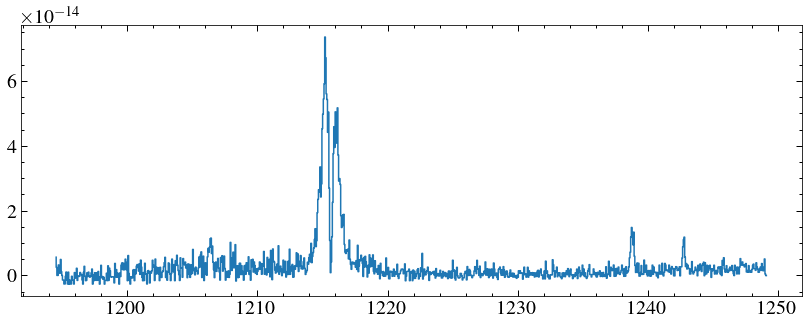

In [6]:
plt.step(wo, fo)

In [7]:
import stistools


The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/stsci/tools/nmpfit.py:8: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/stsci/tools/gfit.py:18: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


In [39]:
raw = '{}oehua2010_flt.fits'.format(path)
rootname = fits.getheader(raw)['ROOTNAME'] 
# outname = 'output/{}_old.fits'.format(rootname)
outname = 'output/{}_old_x1d.fits'.format(rootname)
# stistools.calstis.calstis(raw, outroot = outname, trailer='{}_og.trl'.format(rootname))
stistools.x1d.x1d(raw, output = outname, trailer='{}_og.trl'.format(rootname))

0

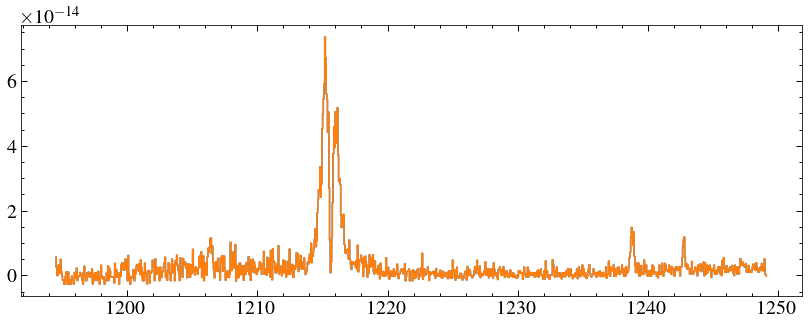

In [40]:
#check it worked
newog = fits.getdata('output/oehua2010_old_x1d.fits', 1)[0]
plt.step(newog['WAVELENGTH'], newog['FLUX'])
plt.step(wo, fo)
#good

In [65]:
outname = 'output/{}_new10_x1d.fits'.format(rootname)
# stistools.calstis.calstis(raw, outroot = outname, trailer='{}_og.trl'.format(rootname))
stistools.x1d.x1d(raw, output = outname, trailer='{}_new.trl'.format(rootname), bk1offst=-10,  bk2offst=10)

0

In [66]:
# fits.getdata('{}oehua2010_x1d.fits'.format(path), 1)['BK2OFFST']

array([300.], dtype=float32)

In [83]:
newspec = fits.getdata('output/oehua2010_new_x1d.fits', 1)[0]
wn, fn, en = newspec['WAVELENGTH'], newspec['FLUX'], newspec['ERROR']

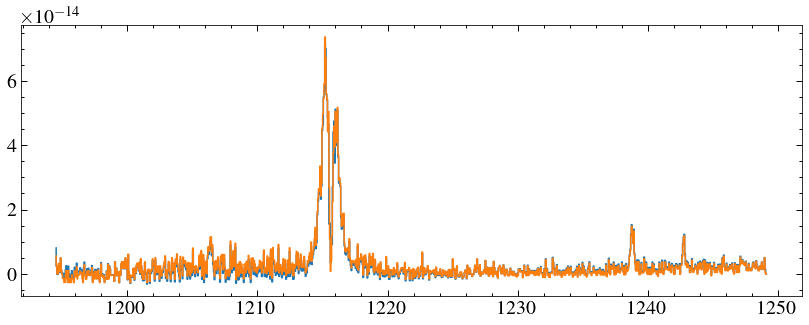

In [84]:
plt.step(wn, fn)
plt.step(wo, fo)

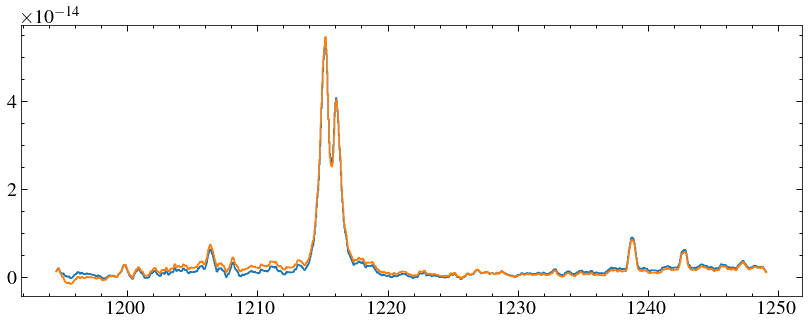

In [85]:
foi = convolve(fo,Box1DKernel(10))
fni = convolve(fn,Box1DKernel(10))

plt.step(wn, fni)
plt.step(wo, foi)

In [86]:
cpath = '/media/david/2tb_ext_hd/hddata/eg_uma/hst/cos/'
cx = glob.glob('{}*x1dsum.fits'.format(cpath))[0]

smooth=5
data = fits.getdata(cx, 1)
wc = np.array([], dtype=float)
fc = np.array([], dtype=float)
ec = np.array([], dtype=float)
for dt in data[::-1]:
    wi, fi, ei, dq = dt['WAVELENGTH'], dt['FLUX'], dt['ERROR'], dt['DQ']
   # mask = (fi>0) & (dq == 0) & (wi < 1213) | (wi > 1217) & (fi>0) & (dq == 0) 
    mask = (dq==0)
    wi, fi, ei = wi[mask], fi[mask], ei[mask]
    wc = np.concatenate((wc, wi))
    fc = np.concatenate((fc, fi))
    ec = np.concatenate((ec, ei))    

fc = convolve(fc,Box1DKernel(smooth))
ec = convolve(ec,Box1DKernel(smooth))/(smooth**0.5)

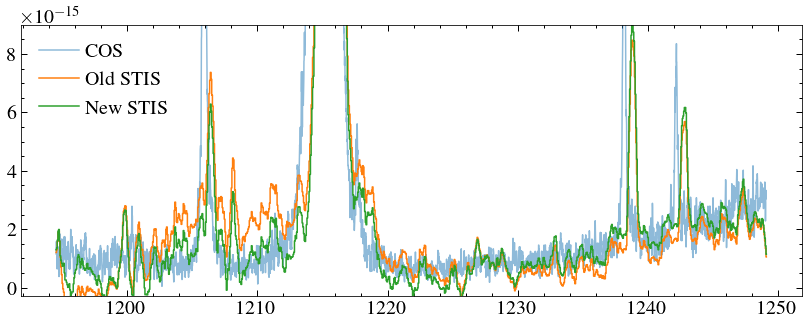

In [88]:
cos_mask = (wc >= wn[0])   & (wc <=wn[-1])
  
plt.plot(wc[cos_mask], fc[cos_mask], label='COS', alpha=0.5)
plt.step(wo, foi, alpha=1, where='mid', label = 'Old STIS')
plt.step(wn, fni, alpha=1, where='mid', label = 'New STIS')
plt.ylim(-0.3e-15, 0.9e-14)
plt.legend()

In [87]:
# newspec50 = fits.getdata('output/oehua2010_new_x1d.fits', 1)[0]
# w50, f50, e50 = newspec50['WAVELENGTH'], newspec50['FLUX'], newspec50['ERROR']
# plt.plot(wn, fn)
# plt.plot(w50, f50)
# plt.show()
# plt.plot(wn, fn/f50)

In [97]:
testspec = fits.getdata('{}oehua1010_x1d.fits'.format(path), 1)[0]
wt, ft, et = testspec['WAVELENGTH'], testspec['FLUX'], testspec['ERROR']
fti = convolve(ft,Box1DKernel(10))

(-3e-16, 9e-15)

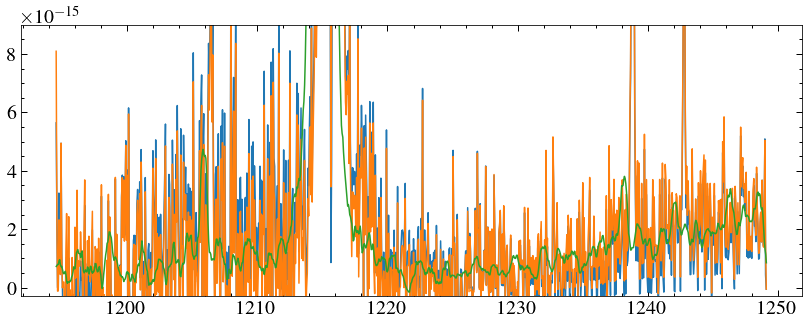

In [103]:
plt.plot(wo, fo)
plt.plot(wn, fn)
plt.plot(wt, fti)
plt.ylim(-0.3e-15, 0.9e-14)


(1210.0, 1220.0)

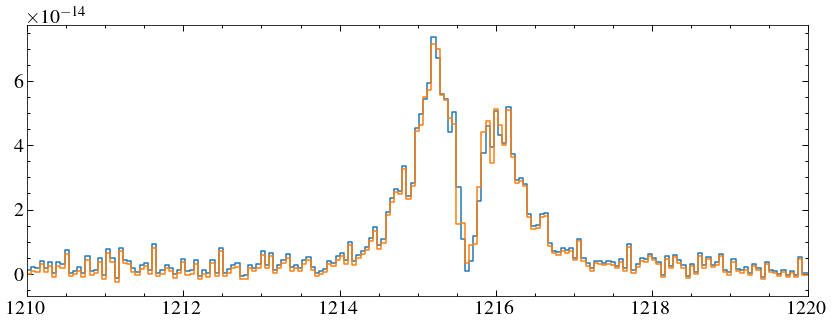

In [102]:
plt.step(wo, fo)
plt.step(wn, fn)
plt.xlim(1210, 1220)

In [110]:
fits.getheader(raw,1)

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1024 / length of data axis 1                          
NAXIS2  =                 1024 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2021-04-02' / date this file was written (yyyy-mm-dd)                
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
ROOTNAME= 'oehua2010        